Отримую дані погоди...
Зберігаю в файл...
Будую графік...


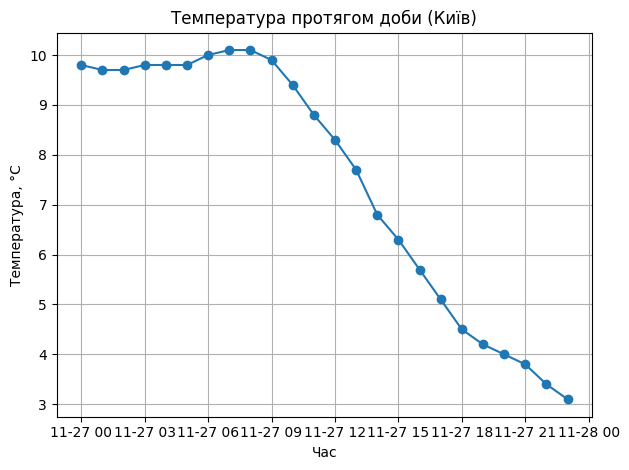

Готово!


In [2]:
#weather_plot.py
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_weather():
    #візьмемо безкоштовний API без ключа (Open-Meteo)
    url = (
        "https://api.open-meteo.com/v1/forecast"
        "?latitude=50.45&longitude=30.52"
        "&hourly=temperature_2m"
        "&forecast_days=1"
    )

    response = requests.get(url)
    response.raise_for_status()
    data = response.json()

    times = data["hourly"]["time"]
    temps = data["hourly"]["temperature_2m"]

    return times, temps

def save_to_file(times, temps, filename="weather_data.txt"):
    with open(filename, "w", encoding="utf-8") as f:
        f.write("time,temperature\n")
        for t, temp in zip(times, temps):
            f.write(f"{t},{temp}\n")

def plot_data(times, temps):
    #перетворюємо строки часу в обʼєкти datetime (беремо тільки години)
    x = [datetime.fromisoformat(t) for t in times]

    plt.figure()
    plt.plot(x, temps, marker="o")
    plt.title("Температура протягом доби (Київ)")
    plt.xlabel("Час")
    plt.ylabel("Температура, °C")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("Отримую дані погоди...")
    times, temps = get_weather()
    print("Зберігаю в файл...")
    save_to_file(times, temps)
    print("Будую графік...")
    plot_data(times, temps)
    print("Готово!")

if __name__ == "__main__":
    main()
